Автор задач Karpov.Courses https://karpov.courses/analytics?_gl=1*k4q7fv*_ga*MTIzOTE2ODc5MS4xNzA4NDEyMTEy*_ga_DZP7KEXCQQ*MTcxMDQxMTg2OS41Ni4xLjE3MTA0MTUyODkuMTAuMC4w

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.

# Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). 
# Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [10]:
path_to_file = '3_taxi_peru.csv'

In [11]:
columns_to_date = ['start_at', 'end_at', 'arrived_at']
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=columns_to_date)
taxi.head()
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [9]:
taxi = taxi.query("start_type=='asap' or start_type=='reserved'")

In [5]:
#разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.
taxi['wait_time'] = taxi.arrived_at - taxi.start_at
taxi.wait_time = taxi.wait_time.astype('timedelta64[m]')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


In [48]:
#в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

driver_lateness = taxi.query("wait_time > 0")\
    .groupby('driver_id')\
    .agg({'driver_start_lat':'count'})\
    .sort_values('driver_start_lat', ascending=False)

,rider_score,driver_start_lat
5,5.0,4565
4,4.0,410
0,0.0,89
3,3.0,62
1,1.0,10


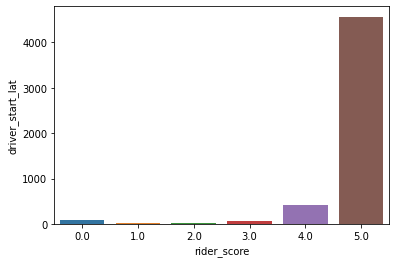

In [61]:
driver_score_to_client = taxi.query("wait_time <= 0").groupby('rider_score', as_index=False)\
    .agg({'driver_start_lat':'count'})\
    .sort_values('driver_start_lat', ascending=False).sort_values('driver_start_lat', ascending=False)
sns.barplot(data=driver_score_to_client, x='rider_score', y='driver_start_lat')
driver_score_to_client.head()

,rider_score,driver_start_lat
5,5.0,8723
4,4.0,942
0,0.0,255
3,3.0,149
1,1.0,22


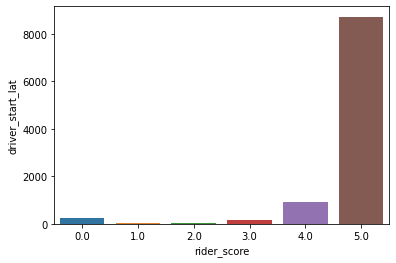

In [62]:
driver_score_to_client = taxi.query("wait_time > 0").groupby('rider_score', as_index=False)\
    .agg({'driver_start_lat':'count'})\
    .sort_values('driver_start_lat', ascending=False).sort_values('driver_start_lat', ascending=False)
sns.barplot(data=driver_score_to_client, x='rider_score', y='driver_start_lat')
driver_score_to_client.head()

In [45]:
taxi['month'] = taxi["start_at"].dt.month
taxi['weekday'] = pd.to_datetime(taxi["start_at"]).dt.strftime('%A')

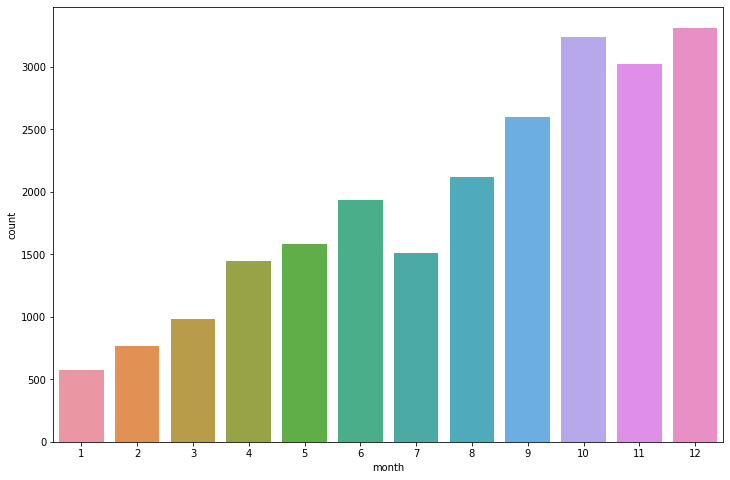

In [77]:
plt.figure(figsize=(12, 8))
sns.countplot(data=taxi, x='month')

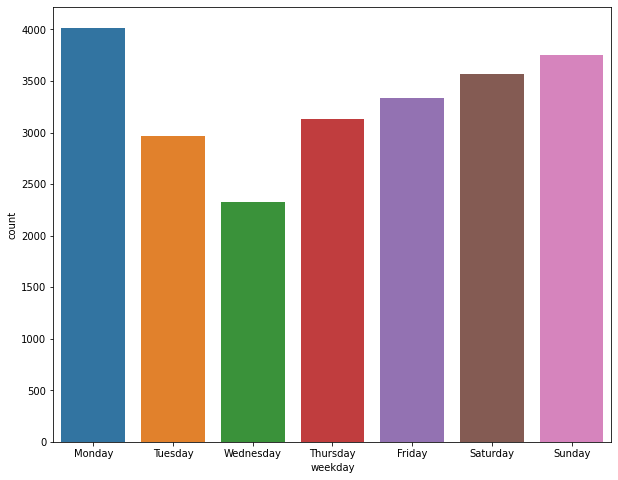

In [82]:
plt.figure(figsize=(10, 8))
sns.countplot(data=taxi, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [46]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
month                        int64
weekday                     object
Date                        object
dtype: object

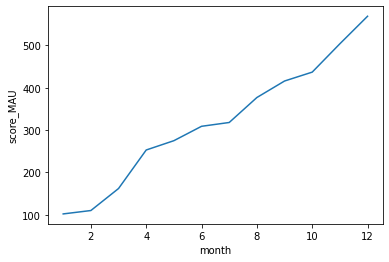

In [49]:
# Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

# DAU (daily active users) – число уникальных пользователей за день
# WAU (weekly active users) – число уникальных пользователей за неделю
# MAU (monthly active users) – число уникальных пользователей за месяц
# Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. 
#Постройте график MAU и выберите верные утверждения. 

# Могут пригодиться:

# groupby – группировка
# nunique – число уникальных значений
# plot.line – линейная диаграмма
taxi['month'] = taxi["start_at"].dt.month
MAU = taxi\
    .groupby('month', as_index=False)\
    .agg({'user_id':'nunique'})\
    .rename(columns={'user_id':'score_MAU'})\
    .sort_values('month')
sns.lineplot(data=MAU, x='month', y='score_MAU')